In [6]:
%matplotlib widget
from main import *
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Heaviside, sin, cos, pi
sp.init_printing()

In [7]:
Vcc = 5

Vin = 10
fs = 10 #Hz
D = 0.1
switch = cos(2 * pi * fs * t) - 1 + 2 * D

In [8]:
acTest = Solver.Circuit("buck")
acTest.element(
                    VoltageSource("Vin", {"V+" : "Vg", "V-" : Gnd}, V_t = Vin),
                    Resistor("Rin", {"V1" : "Vg", "V2" : "Vin"}, R = 50),
                    
                    Relay("S", {"V1" : "Vin", "V2" : "Vs", "V+" : "S", "V-" : Gnd}),                    
                    VoltageSource("Vs", {"V+" : "S", "V-" : Gnd}, V_t = switch),
                    
                    Diode("D1", {"Vp" : Gnd, "Vn" : "Vs"}, Vd = 0),
                    
                    Inductor("L1", {"V1" : "Vs", "V2" : "Vout"}, L = 1e-3, I0 = 0),
                    #Resistor("R1", {"V1" : "Vs", "V2" : "Vout"}, R = 1e3),

                    Capacitor("C1", {"V1" : "Vout", "V2" : Gnd}, C = 1e-6, V0 = 0),
                    
                    #CurrentSource("Iout", {"V+" : "Vout", "V-" : Gnd}, I_t = -10e-3),
                    Resistor("Rout", {"V1" : "Vout", "V2" : Gnd}, R = 1e3),
)

{'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 10}},
 'Rin': {'name': 'Rin', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vin'}, 'values': {'R': 50}},
 'S': {'name': 'S', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vs', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}},
 'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(20*pi*t) - 0.8}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 0, 'Vn': 'Vs'}, 'values': {'Vd': 0, 'T': 300}},
 'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'Vs', 'V2': 'Vout'}, 'values': {'L': 0.001, 'I0': 0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'C': 1e-06, 'V0': 0}},
 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 1000.0}}}

In [9]:
Solver.setMain("buck")
compiled = Solver.compile()

In [10]:
model = solveLaplace(compiled, 3 * sp.pi, tstep = 0.001, debugLog = 1)

{V0, I1_1, V4, I5_1, V1, I5_0, I2_0, V3, I2_1, I7_1, I2_2, I2_3, I1_0, I4_0, I6_0, I3_1, V2, I7_0, I4_1, I0_0, I3_0, I6_1, I0_1}
[Eq(I1_1 + I2_0, 0), Eq(I2_1 + I4_1 + I5_0, 0), Eq(I5_1 + I6_0 + I7_0, 0), Eq(I2_2 + I3_0, 0), Eq(I0_0 + I1_0, 0)]
{'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 10}}, 'Rin': {'name': 'Rin', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vin'}, 'values': {'R': 50}}, 'S': {'name': 'S', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vs', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}}, 'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(20*pi*t) - 0.8}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 0, 'Vn': 'Vs'}, 'values': {'Vd': 0, 'T': 300}}, 'L1': {'name': 'L1', 'type': 'Inductor', 'nodes': {'V1': 'Vs', 'V2': 'Vout'}, 'values': {'L': 0.001, 'I0': 0}}, 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vout',

In [ ]:

print(compiled["nodes"])

S = compiled["nodes"]["S"]
Vs = compiled["nodes"]["Vs"]

Vout = compiled["nodes"]["Vout"]


{'Vin': V0, 'S': V1, 'Vout': V2, 'Vs': V3}


In [ ]:
printModel(model, var=t, measurments={Vout})

{('S', 'Closed'), ('Vin', ''), ('Vs', ''), ('Iout', ''), ('C1', ''), ('R1', '')}
t ∈ Interval.Ropen(0, 0.0102416687011719)
V2  : 
           -t
999   499⋅ℯ  
─── - ───────
100     100  
-------------------------------------
{('Vin', ''), ('Vs', ''), ('S', 'Open'), ('Iout', ''), ('R1', ''), ('C1', '')}
t ∈ Interval.Ropen(0.0102416687011719, 0.0897585144042970)
V2  : 
505084511298231    t 
─────────────── - ───
100000000000000   100
-------------------------------------
{('S', 'Closed'), ('Vin', ''), ('Vs', ''), ('Iout', ''), ('C1', ''), ('R1', '')}
t ∈ Interval.Ropen(0.0897585144042970, 0.110241668701172)
V2  : 
                      -t
999   30874687846717⋅ℯ  
─── - ──────────────────
100     6250000000000   
-------------------------------------
{('Vin', ''), ('Vs', ''), ('S', 'Open'), ('Iout', ''), ('R1', ''), ('C1', '')}
t ∈ Interval.Ropen(0.110241668701172, 0.189758514404297)
V2  : 
515020644146287    t 
─────────────── - ───
100000000000000   100
----------------------------------

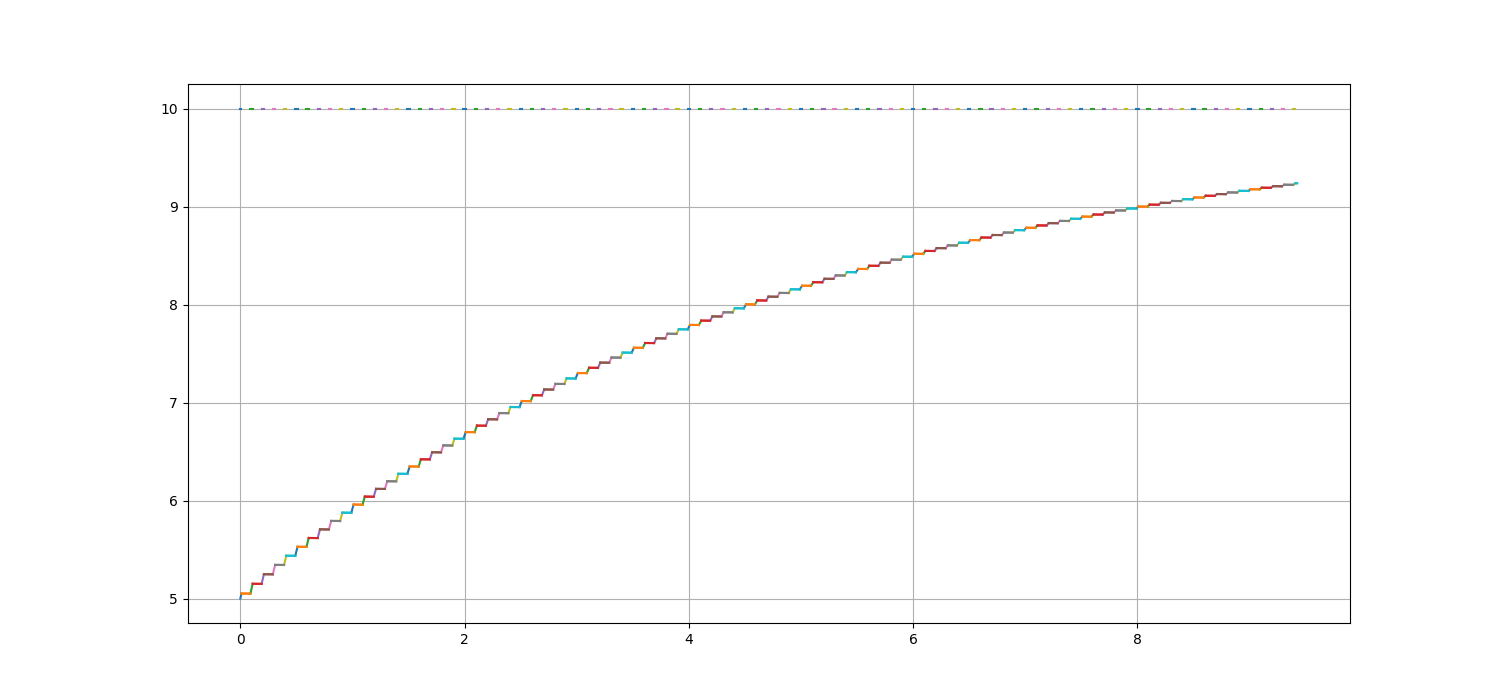

In [ ]:
measurments =   [   
                    (t0, Vout, "Vin(t)"),
                    (t0, Vs, "Vc(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()